# Digit Recognition using K-NN

## MNIST dataset downloaded from Kaggle : 
## https://www.kaggle.com/c/digit-recognizer/data


### About The MNIST Dataset
#### MNIST is a simple computer vision dataset. It contains collection of handwritten digits. Every image is of 28 by 28 pixels:
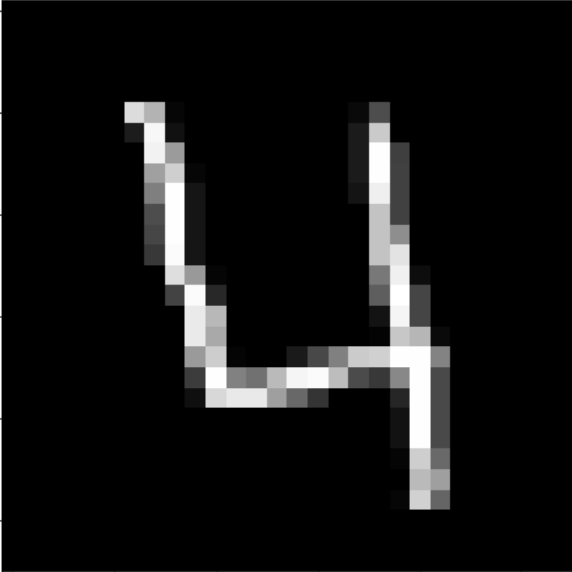
#### Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. For example, we might think of  as something like:
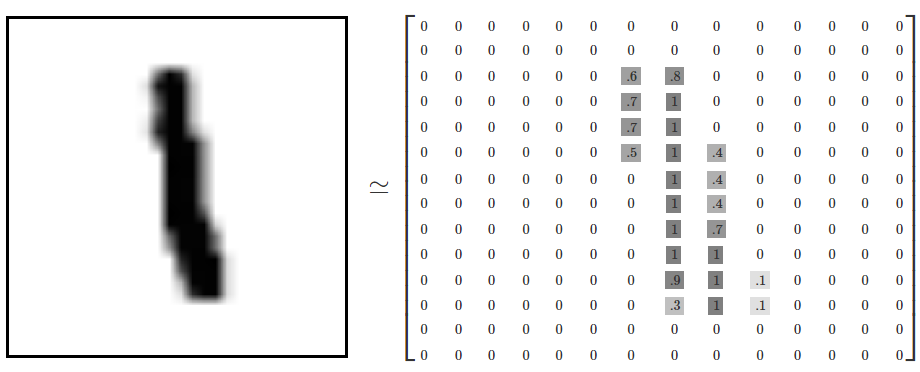
#### We need to convert the image into a vector containing real numerical values. For this, since each image has 28 by 28 pixels, we get a 28x28 array. Each component corresponding to that pixel has a value between 0 and 1 depending on the darkness of the pixel. Completely while pixel has value = 0, while completely black pixel has value = 1. 
#### We can flatten each array into a 28∗28=784 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.


## Importing libraries and the dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

dinit = pd.read_csv('./mnist_train.csv')


### Printing first five rows of d0.

In [2]:
print(dinit.head(5)) 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [8]:
# Save the labels into a variable l.
l = dinit['label']

# Drop the label feature and store the pixel data in d.
d = dinit.drop("label",axis=1)

print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


# Displaying picture of any Digit

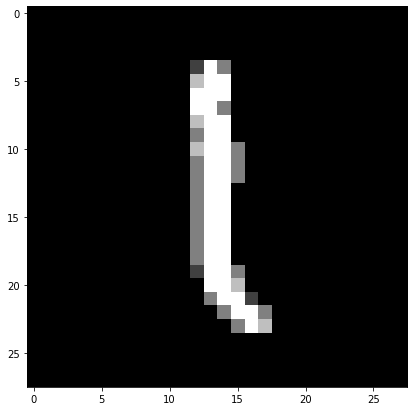

1


In [9]:

plt.figure(figsize=(7,7))
ind = 400

grid_data = d.iloc[ind].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
#intitial note had as_array instead of to_numpy, as_array now gives error, so I have changed it
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[ind])

### We will be using only the first 20000 data points

In [10]:
Data=d.head(20000)
Label=l.head(20000)
print(Data.shape)
print(Label.shape)

(20000, 784)
(20000,)


### Splitting the dataset into Train(Xtrain, Ytrain), Test(Xtest, Ytest) and Cross Validation(Xcv, Ycv)

In [11]:
X1, Xtest, Y1, Ytest= model_selection.train_test_split(Data, Label, test_size=0.2, random_state=42)
Xtrain, Xcv, Ytrain, Ycv= model_selection.train_test_split(X1, Y1, test_size=0.25, random_state=42)
print("****************************")
print("Train Data Shape")
print(Xtrain.shape)
print(Ytrain.shape)
print("****************************")
print("Test Data Shape")
print(Xtest.shape)
print(Ytest.shape)
print("****************************")
print("Cross Validation Data Shape")
print(Xcv.shape)
print(Ycv.shape)


****************************
Train Data Shape
(12000, 784)
(12000,)
****************************
Test Data Shape
(4000, 784)
(4000,)
****************************
Cross Validation Data Shape
(4000, 784)
(4000,)


### We will be training our model using KNN

In [12]:
for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, Ytrain)
    pred = knn.predict(Xcv)
    acc = accuracy_score(Ycv, pred, normalize=True) * float(100)
    print('\n Cross Validation Score for k = %d is %d%%' % (i, acc))



 Cross Validation Score for k = 1 is 95%

 Cross Validation Score for k = 3 is 95%

 Cross Validation Score for k = 5 is 95%

 Cross Validation Score for k = 7 is 94%

 Cross Validation Score for k = 9 is 94%

 Cross Validation Score for k = 11 is 94%

 Cross Validation Score for k = 13 is 94%

 Cross Validation Score for k = 15 is 93%

 Cross Validation Score for k = 17 is 93%

 Cross Validation Score for k = 19 is 93%

 Cross Validation Score for k = 21 is 93%

 Cross Validation Score for k = 23 is 93%

 Cross Validation Score for k = 25 is 92%

 Cross Validation Score for k = 27 is 92%

 Cross Validation Score for k = 29 is 92%


### The CV score for K=5 is highest, thus the we will choose k=5; 

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, Ytrain)
pred = knn.predict(Xtest)
acc = accuracy_score(Ytest, pred, normalize=True) * float(100)
print('Test Accuracy Score for this Model is= %d%%' % (acc))

Test Accuracy Score for this Model is= 95%


#### By Simeet Nayan
#### https://simeetnayan81.github.io